**IMAGE INTERPRETATION USING LIME**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
# file_name = "/content/drive/MyDrive/archive.zip"
file_name = '/content/drive/MyDrive/Mangesh_Project/PROJECT/Exaplainable_AI/val'
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()

print("completed")

completed


In [ ]:
# Path to train and test directory
dir_ = os.path.join(file_name)


# Generate training and test data with Image Generator
train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split = 0.2)


train_generator = train_datagen.flow_from_directory(dir_,target_size=(256, 256),
                                                   batch_size= 20,
                                                   class_mode='categorical',
                                                   shuffle=False,
                                                   subset = 'training')

test_generator = train_datagen.flow_from_directory(dir_,
                                                          target_size=(256, 256),
                                                          batch_size= 20,
                                                          class_mode = 'categorical',
                                                          shuffle=False,
                                                          subset = 'validation')


# Fetch the data and the labels
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)

# Fix the filepath
test_filepath = []
for filepath in test_generator.filepaths:
    filepath = filepath.replace('\\', '/')
    test_filepath.append(filepath)

Found 196 images belonging to 12 classes.
Found 42 images belonging to 12 classes.


In [ ]:
model = Sequential([

    # First convolution
        Conv2D(16, (3,3), activation='relu', input_shape=(256,256, 3)),
        MaxPooling2D(2, 2),

    # Second convolution
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),

    # Third convolution
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),

    # Dense hidden layer
        Dense(512, activation='relu'),
        Dropout(0.2),

    # Output neuron.
        Dense(12, activation='softmax')
])

In [ ]:
#@title Inception model: V3
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator,
                    validation_steps=1,
                    epochs = 10,
                    verbose = 1)



Epoch 1/10
10/10 [==============================] - 14s 1s/step - loss: 1.4762 - accuracy: 0.4388
Epoch 2/10
10/10 [==============================] - 14s 1s/step - loss: 1.3268 - accuracy: 0.4694
Epoch 3/10
10/10 [==============================] - 15s 1s/step - loss: 1.2234 - accuracy: 0.5408
Epoch 4/10
10/10 [==============================] - 14s 1s/step - loss: 1.0677 - accuracy: 0.6071
Epoch 5/10
10/10 [==============================] - 14s 1s/step - loss: 0.9202 - accuracy: 0.6173
Epoch 6/10
10/10 [==============================] - 14s 1s/step - loss: 0.6744 - accuracy: 0.7449
Epoch 7/10
10/10 [==============================] - 14s 1s/step - loss: 0.6207 - accuracy: 0.7551
Epoch 8/10
10/10 [==============================] - 14s 1s/step - loss: 0.5196 - accuracy: 0.8061
Epoch 9/10
10/10 [==============================] - 14s 1s/step - loss: 0.5565 - accuracy: 0.7755
Epoch 10/10
10/10 [==============================] - 14s 1s/step - loss: 0.3586 - accuracy: 0.8878


**Pretrained Inception model: V3**

In [ ]:
from tensorflow.keras.applications import inception_v3 as inc_net

In [ ]:
from skimage.io import imread
from skimage.transform import resize

In [ ]:
from skimage import io
from tensorflow.keras.preprocessing import image

url = '/content/drive/MyDrive/Mangesh_Project/PROJECT/Exaplainable_AI/sugar_apple_dataset/black stain/IMG_20221026_115247.jpg'

def read_and_transform_img(url):

    img = imread(url)
    img = resize(img, (256,256))       #256*256

    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = read_and_transform_img(url)

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

# if prediction == 0:
#     print('It\'s a cat!')
# elif prediction == 1:
#     print('It\'s a dog!')
# else:
#     print('It\'s a panda!')

if prediction==0:
      print("Canker_fruits-disease")

elif prediction==1:
      print("Caterpillar worms leaf Disease")

elif prediction==2:
      print("Faint color fruit disease")

elif prediction==3:
      print("InitialBurn leaf Disease")

elif prediction==4:
      print("Myrtle Rust leaf disease")

elif prediction==5:
      print("Nutrition deficiency leaf disease")

elif prediction==6:
      print("SemiBurn leaaf disease")

elif prediction==7:
      print("crack_fruits_disease")
elif prediction==8:
      print("diplodia_fruits_disease")

elif prediction==9:
      print("fungi_fruits_disease")
elif prediction==10:
      print("shrink leaf disease")
elif prediction==11:
      print("uneven size fruit disease")



print("Accuracy of these prediction is",pct)

1/1 [==============================] - 0s 139ms/step
Faint color fruit disease
Accuracy of these prediction is 0.36492613


In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 5.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=7696ab4084f4a7459327db3a9d0cdaf6518e261f0a5401cf3fcd1ac762bdd8bb
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()


In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 224ms/step


(-0.5, 255.5, 255.5, -0.5)

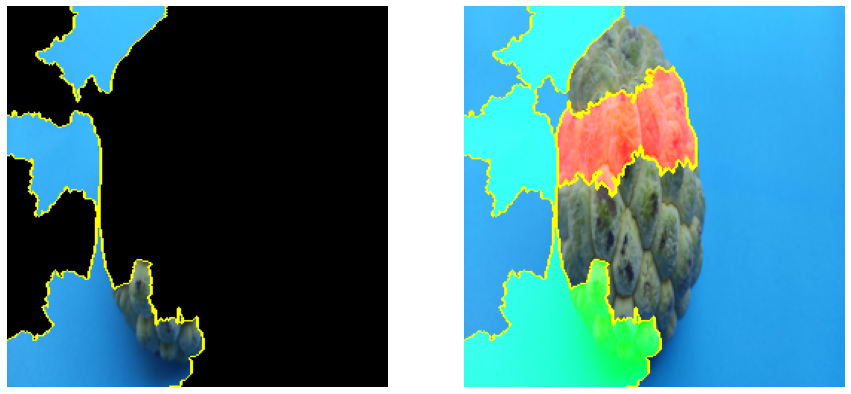

In [ ]:

from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

In [ ]:
import skimage

In [ ]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

def transform_img_fn_ori(url):

    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (299,299))
    img = (img - 0.5)*2
    img = np.expand_dims(img, axis=0)
    preds = inet_model.predict(img)
    for i in decode_predictions(preds)[0]:
        print(i)
    return img

inet_model = inc_net.InceptionV3()
images_inc_im = transform_img_fn_ori(url)

1/1 [==============================] - 2s 2s/step
('n07760859', 'custard_apple', 0.8854176)
('n01664065', 'loggerhead', 0.0016310773)
('n03259280', 'Dutch_oven', 0.0010109125)
('n07718747', 'artichoke', 0.0010038383)
('n01667778', 'terrapin', 0.0007252973)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


(-0.5, 255.5, 255.5, -0.5)

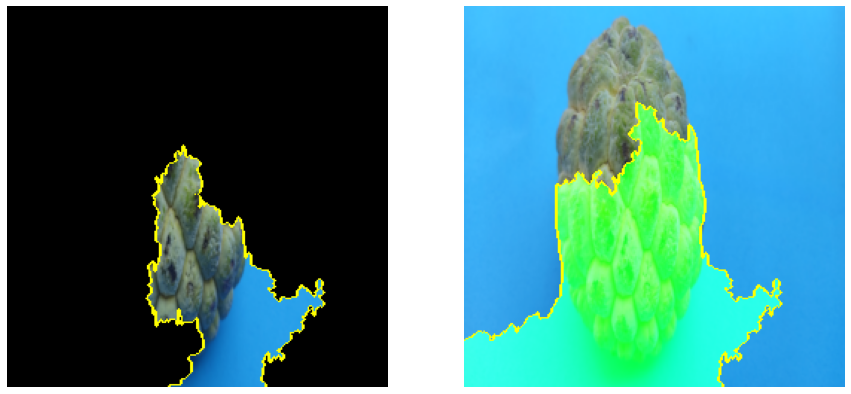

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

In [ ]:
pip install jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.4 MB/s 
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6502 sha256=a08f1be724470bac353c4c3bba0e0ea9a8b70ed1a55565e67fbbf2e828457019
  Stored in directory: /root/.cache/pip/wheels/1b/6c/cb/f9aae2bc97333c3d6e060826c1ee9e44e46306a178e5783505
Successfully built uuid


In [ ]:
import jovian


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
